## Advanced Machine Learning - Scikit Learn 
### with Adreas Mueller

## Support Vector Machines (SVM)
* Very powerful ML algorithm for Regression and Classification; SVM for classification are implemented in SVC class 
* SVC are generalization of linear classifiers, that use so-called Kernels to create non-linear decisions
* What kind of decision boundary that is learned is based on choice of kernel and parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Example: Binary task of classifying hand-written digits into odd or even numbers
* Load digits dataset, normalize features between 0 and 1, by dividing by 16 
* Compute the target model as making class labels as even number or odd number 

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target % 2, random_state=2)

#### For binary case:
* SVC with linear kernel is just the same as SVC, though linear SVC is much faster
* Different default settings; set loss to be hinge in LinearSVC
* This results in identical predictions

In [4]:
from sklearn.svm import LinearSVC, SVC
linear_svc = LinearSVC(loss="hinge").fit(X_train, y_train)
svc = SVC(kernel="linear").fit(X_train, y_train)

In [5]:
np.mean(linear_svc.predict(X_test) == svc.predict(X_test))

1.0

#### For Multi-Class Problems:
* SVC and LinearSVC use slightly different strategies, so they are not equivalent

##### Now to the real power of SVMs using non-linear Kernels...

## Kernel SVMs
SVM algorithm has one important hyper-parameter, C, the regularization parameter which bounds the influence of each individual samples, similar to the case of linear classifiers
* Low values of C correspond to strong regularization, as each data point can only have very limited influence; this leads to many support vectors, so many alphas are non-zero
* High values of C means less regularization, allows each data point to have a lot of influence
* More precisely, each alpha parameter can only be between zero and C

Predictions in a kernel-SVM are made using the formula:
$$
\hat{y} = \alpha_0 + \alpha_1 y_1 k(\mathbf{x^{(1)}}, \mathbf{x}) + ... + \alpha_n y_n k(\mathbf{x^{(n)}}, \mathbf{x})> 0
$$

$$
0 \leq \alpha_i \leq C
$$

#### The Kernel Function most commonly used is Radial basis function (Gaussian) kernel:
$$k(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma ||\mathbf{x} - \mathbf{x'}||^2)$$

##### It's easy to plot this function in 1D
* Fix training data point at zero and show the value as a function of different test data points
* The Gaussian kernel has a free parameter, gamma, that allows to control how wide the Gaussian is
* Large values means that only close values are relvant; small values means far points are similar 

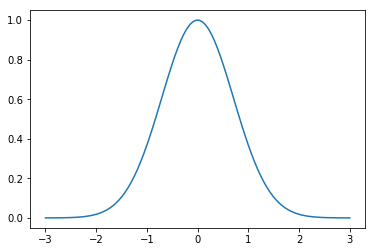

In [6]:
from sklearn.metrics.pairwise import rbf_kernel
line = np.linspace(-3, 3, 100)[:, np.newaxis]
kernel_value = rbf_kernel([[0]], line, gamma=1)
plt.plot(line, kernel_value.T)

### Effects of C and gamma parameters
For default settings, decision boundary is already quite non-linear
* Increasing C will lead to an even more curved decision boundary, to correctly classify all training data points, more smooth boundary, focusing more on the main body of the classes
* For some small value of C, all points will become support vectors (i.e., non-zero alpha); C limits the influence of each data point, and if you decrease C even further, nothing more can happen

#### Strong interaction for settings of C and gamma parametters
* Increasing gamma means that more points will be considered neighbors, resulting in a smoother decision boundary; at some point, the decision becomes practically linear
* If we allow both C and gamma to be large, each points can have an arbitrary large influence in a very small region; this leads to a very bumpy decision boundary, each point can become its own island  

//anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


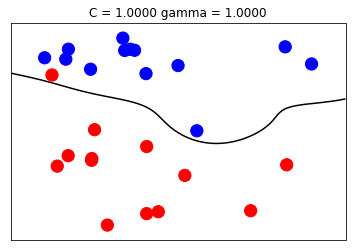

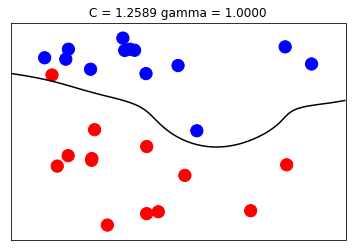

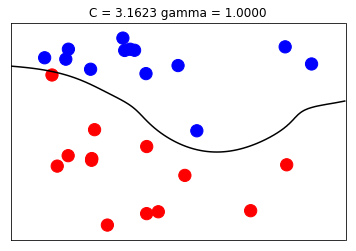

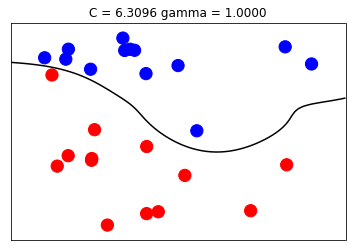

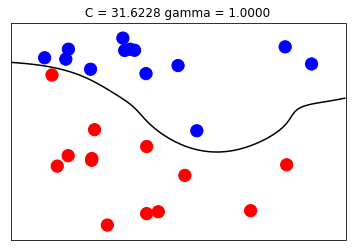

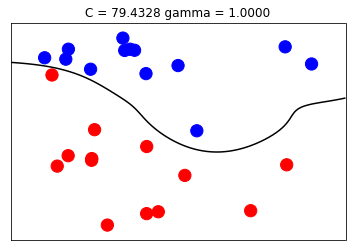

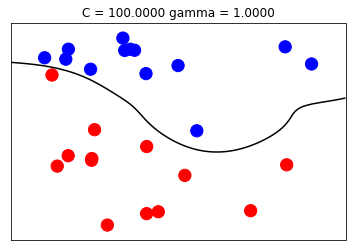

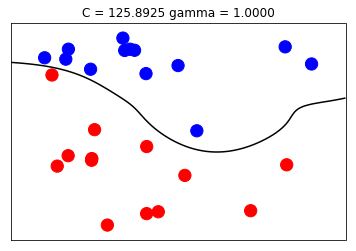

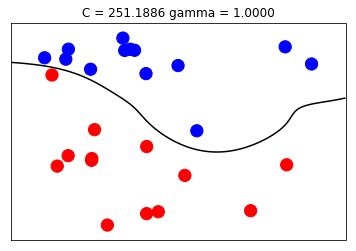

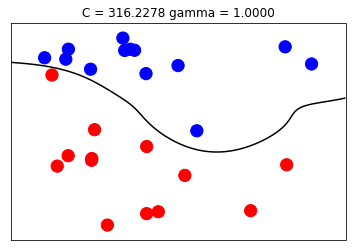

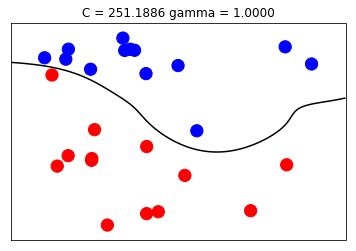

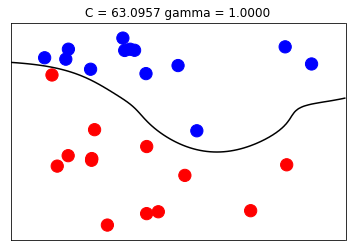

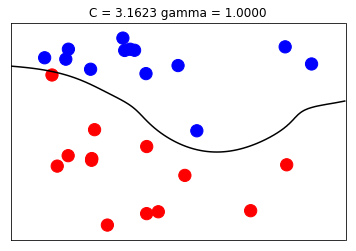

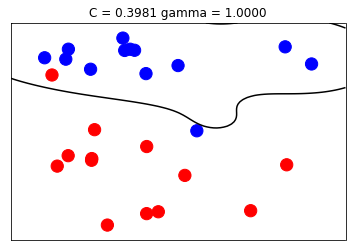

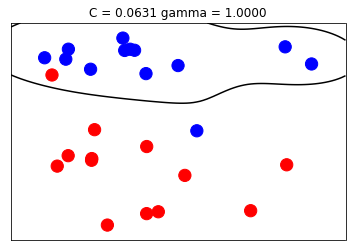

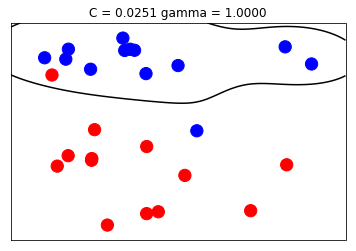

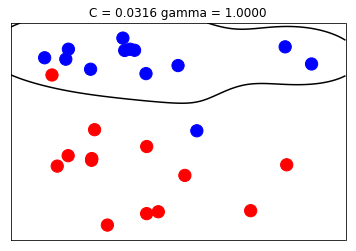

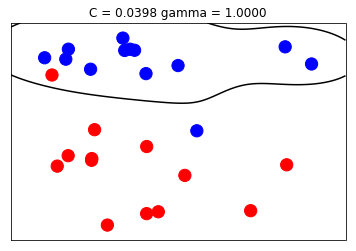

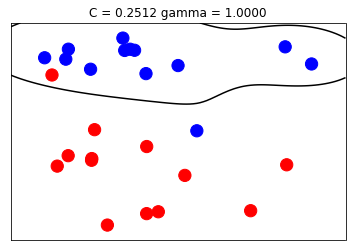

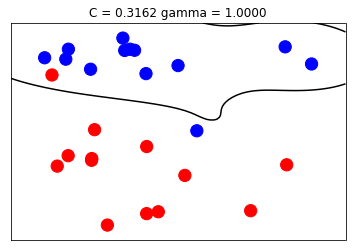

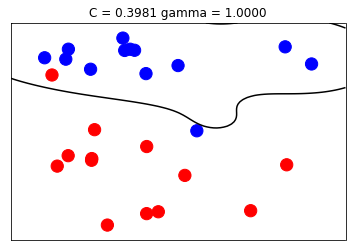

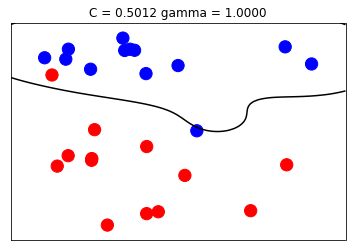

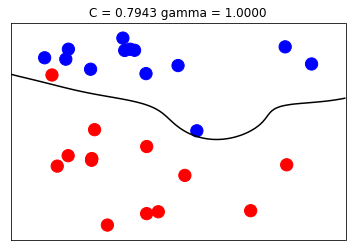

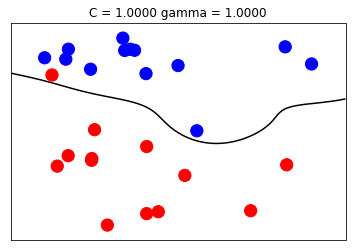

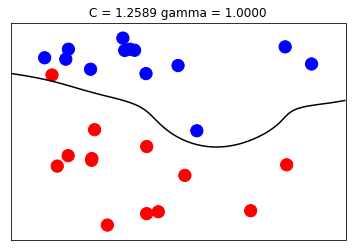

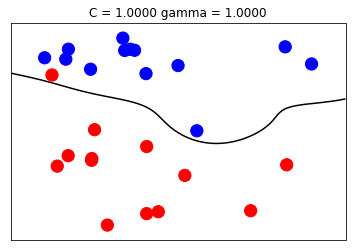

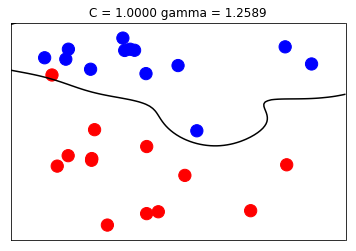

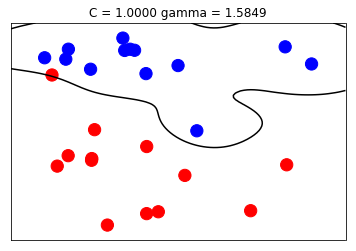

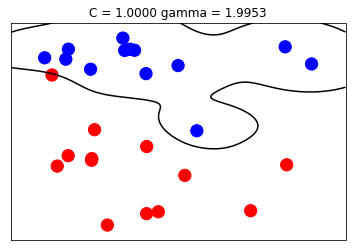

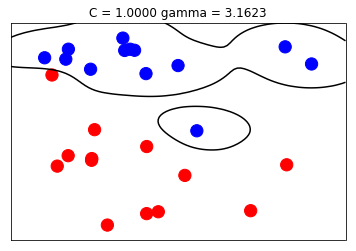

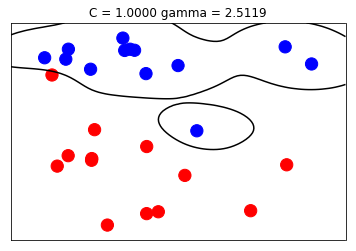

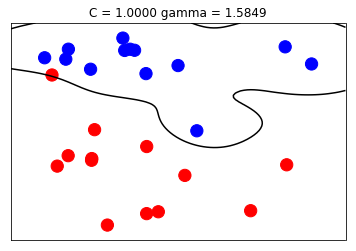

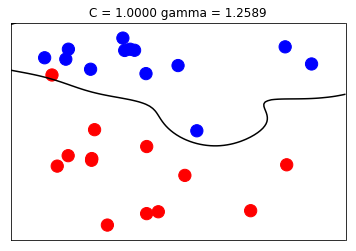

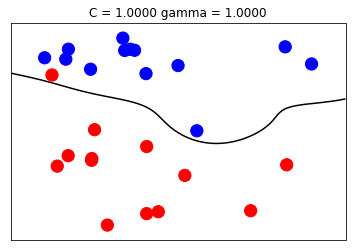

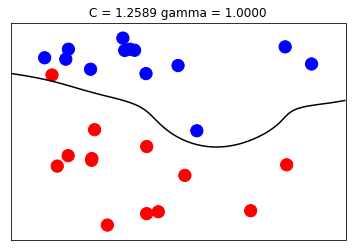

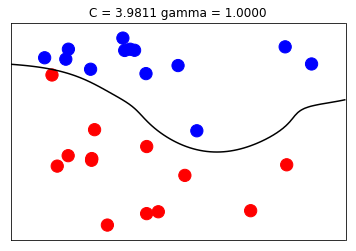

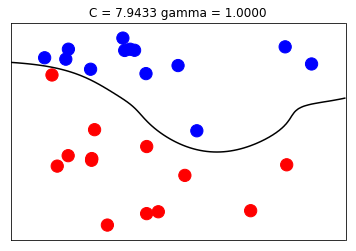

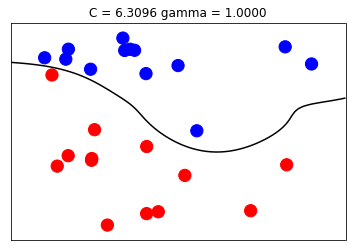

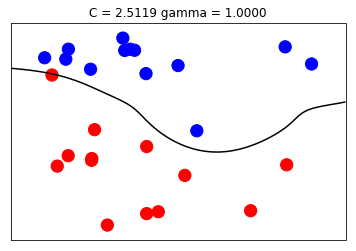

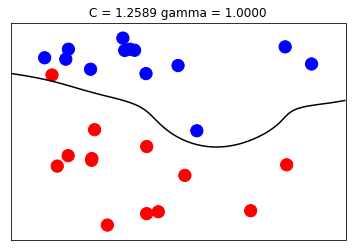

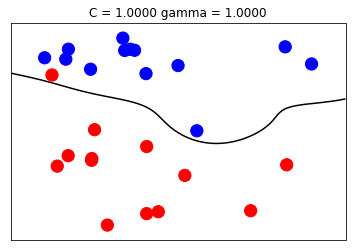

In [7]:
from figures import plot_svm_interactive
plot_svm_interactive()

### Use GridSearch to find optimal values for C and gamma parameters
Using default parameters, you get about 92% correct
* Define dictionary where keys are the values we want to adjust, parameters are settings to try out
* Calling fit performs the GridSearch, cross-validation, and retains the best parameters found
* Using score, you can see we do much better with the right parameters, 98.6% correctly

In [8]:
svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.9177777777777778

In [10]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]

from sklearn.model_selection import GridSearchCV

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [11]:
grid_search.score(X_test, y_test)

0.98666666666666669

### Visualizing the Cross-Validation scores for parameter grid
* We see the strong interaction that C and gamma have, as diagonal line
* Also see how sensitive the Classifier is the choice of C and gamma
* WHile performance for optimal C and gamma is quite good, outside the range performance is at chance

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


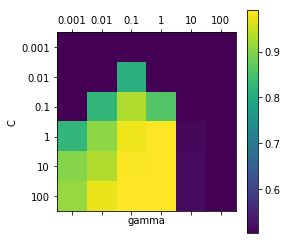

In [12]:
# We extract just the scores
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(6), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

#### Preprocessing your Data
Important to scale your data between 0 and 1